# Project - Dallas Shootings

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- A newspaper want a visualization of the shootings in Dallas with focus on subjects
- We will read data from from database and join into broader datasets
- We will explore ideas to visualize it and create a map with the shootings

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [1]:
import sqlite3

### Step 1.b: Connect to SQLite database
- Use `sqlite3.connect(<filename>)` to connect to the database `files/dallas-ois.sqlite`

In [2]:
conn = sqlite3.connect("./files/dallas-ois.sqlite")

### Step 1. c: Read data into DataFrames
- The database consists of 3 tables: `incident`, `officers`, `subjects`
- Read the data from each table into a DataFrame.
- HINT: Use `pandas` `read_sql(sql_stmt, conn)`, which takes the SQL statement (`sql_stmt`) and the data base connection `conn` from previous step.
- HINT: The structure of the SQL statement is as follows.
```SQL 
SELECT * FROM table
```

In [3]:
import pandas as pd
incidents = pd.read_sql("SELECT * FROM incidents",conn)
officers = pd.read_sql("SELECT * FROM officers",conn)
subjects = pd.read_sql("SELECT * FROM subjects",conn)

### Step 1.d: Explore the length of the DataFrames
- What is the length of the DataFrames
    - HINT: Apply `len(...)` on the DataFrames
- We want to explore data based on officers and data based on subjects, both with incident data.
- Notice: It is difficult to create one dataset for both problems
- Explore data further to understand why

In [4]:
len(incidents),len(subjects)

(219, 223)

### Step 1.e: Read data into dataset
- Create first dataset `subject_incidents` as officers joined with incidents.
    - What does this dataset give us?
    - HINT:
    ```SQL
    SELECT * FROM table_1 JOIN table_2 ON table_1.column_name_1=table_2.column_name_2
    ```
    - HINT: You can join on columns `case_number`
- Is all data represented?

In [5]:
subject_incidents = pd.read_sql("SELECT * FROM incidents JOIN subjects ON incidents.case_number=subjects.case_number",conn)

In [6]:
subject_incidents

,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,...,summary_url,summary_text,latitude,longitude,case_number,race,gender,last_name,first_name,full_name
0,44523A,2013-02-23,3000 Chihuahua Street,Injured,Handgun,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,...,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN,44523A,L,M,Curry,James,"Curry, James"
1,121982X,2010-05-03,1300 N. Munger Boulevard,Injured,Handgun,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,...,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN,121982X,L,M,Chavez,Gabriel,"Chavez, Gabriel"
2,605484T,2007-08-12,200 S. Stemmons Freeway,Other,Shotgun,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,...,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN,605484T,L,M,Salinas,Nick,"Salinas, Nick"
3,384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,Unarmed,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,...,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN,384832T,B,M,Smith,James,"Smith, James"
4,384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,Unarmed,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,...,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN,384832T,B,M,Dews,Antonio,"Dews, Antonio"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,161616-2016,2016-07-03,7440 Chesterfield Drive,Shoot and Miss,Handgun,"Brown, Desroy B/M",1,"Crenshaw, Joshua W/M",1,None,...,http://dallaspolice.net/reports/OIS/narrative/...,7440 Chesterfield Drive 161616-2016\n\nOn July...,32.65628,-96.869793,161616-2016,B,M,Brown,Desroy,"Brown, Desroy"
219,141461-2016,2016-06-11,2700 Custer Drive,Shoot and Miss,Vehicle,Unknown B/M,1,"Moore, Douglas B/M",1,None,...,http://dallaspolice.net/reports/OIS/narrative/...,"2700 Custer Drive 141461-2016\n\nOn June 11, 2...",32.70483,-96.779494,141461-2016,B,M,Unknown,None,Unknown
220,089985-2016,2016-04-16,4800 Columbia Ave,Shoot and Miss,Handgun,Unknown L/M,1,"Ruben, Fredirick W/M",1,None,...,http://dallaspolice.net/reports/OIS/narrative/...,4800 Columbia Avenue 089985-2016\n\nOn April 1...,32.79473,-96.764017,089985-2016,L,M,Unknown,None,Unknown
221,177645-2016,2016-07-23,1716 Chattanooga Place,Shoot and Miss,Handgun,Unknown B/M,1,"Rosen, Brett W/M",1,None,...,None,None,32.81664,-96.851409,177645-2016,B,M,Unknown,None,Unknown


In [7]:
subject_incidents.shape

(223, 21)

## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- A step to get to understand the data better is to explore the data types
- Get the data types by `.dtypes`

In [8]:
subject_incidents.dtypes

case_number                    object
date                           object
location                       object
subject_statuses               object
subject_weapon                 object
subjects                       object
subject_count                   int64
officers                       object
officer_count                   int64
grand_jury_disposition         object
attorney_general_forms_url     object
summary_url                    object
summary_text                   object
latitude                      float64
longitude                     float64
case_number                    object
race                           object
gender                         object
last_name                      object
first_name                     object
full_name                      object
dtype: object

### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isna().sum()```

In [9]:
subject_incidents.isna().any()

case_number                   False
date                          False
location                      False
subject_statuses              False
subject_weapon                False
subjects                      False
subject_count                 False
officers                      False
officer_count                 False
grand_jury_disposition         True
attorney_general_forms_url     True
summary_url                    True
summary_text                   True
latitude                       True
longitude                      True
case_number                   False
race                          False
gender                        False
last_name                     False
first_name                     True
full_name                     False
dtype: bool

In [10]:
subject_incidents.isna().sum()

case_number                     0
date                            0
location                        0
subject_statuses                0
subject_weapon                  0
subjects                        0
subject_count                   0
officers                        0
officer_count                   0
grand_jury_disposition         88
attorney_general_forms_url    221
summary_url                     3
summary_text                    3
latitude                        9
longitude                       9
case_number                     0
race                            0
gender                          0
last_name                       0
first_name                     18
full_name                       0
dtype: int64

In [11]:
len(subject_incidents)

223

### Step 2.c: Explore subject_statuses column
- As part of finding useful features let's explore `subject_statuses`
- We know that `subject_statuses` is categorical.
- Therefore we can use `groupby(...)` and `count()`

In [12]:
subject_incidents['subject_statuses']

0             Injured
1             Injured
2               Other
3      Shoot and Miss
4      Shoot and Miss
            ...      
218    Shoot and Miss
219    Shoot and Miss
220    Shoot and Miss
221    Shoot and Miss
222          Deceased
Name: subject_statuses, Length: 223, dtype: object

In [13]:
 subject_incidents['subject_statuses'].count()

223

In [14]:
subject_incidents.groupby('subject_statuses').count()

,case_number,date,location,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude,case_number,race,gender,last_name,first_name,full_name
subject_statuses,,,,,,,,,,,,,,,,,,,,
1 Deceased 1 Injured,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2
2 Injured,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
Deceased,69,69,69,69,69,69,69,69,67,1,67,67,68,68,69,69,69,69,67,69
Deceased Injured,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2
Injured,60,60,60,60,60,60,60,60,58,1,60,60,57,57,60,60,60,60,60,60
Other,2,2,2,2,2,2,2,2,1,0,2,2,1,1,2,2,2,2,2,2
Shoot and Miss,87,87,87,87,87,87,87,87,4,0,86,86,83,83,87,87,87,87,71,87


### Step 2.d: Explore race column
- Repeat of previous step on column `race`

In [15]:
subject_incidents.groupby('race').count()

,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude,case_number,gender,last_name,first_name,full_name
race,,,,,,,,,,,,,,,,,,,,
A,2,2,2,2,2,2,2,2,2,0,0,2,2,2,2,2,2,2,2,2
B,111,111,111,111,111,111,111,111,111,67,0,109,109,106,106,111,111,111,104,111
L,72,72,72,72,72,72,72,72,72,37,2,71,71,68,68,72,72,72,61,72
W,38,38,38,38,38,38,38,38,38,31,0,38,38,38,38,38,38,38,38,38


### Step 2.e: Explore more columns
- Feel free to explore more columns (also called features)

In [16]:
subject_incidents.groupby('subject_weapon').count()

,case_number,date,location,subject_statuses,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude,case_number,race,gender,last_name,first_name,full_name
subject_weapon,,,,,,,,,,,,,,,,,,,,
Assault Rifle,4,4,4,4,4,4,4,4,1,0,3,3,4,4,4,4,4,4,4,4
BB Gun,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1
BB Rifle,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3
Box Cutter,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
Handgun,98,98,98,98,98,98,98,98,64,1,96,96,95,95,98,98,98,98,89,98
Hands,10,10,10,10,10,10,10,10,7,0,10,10,9,9,10,10,10,10,10,10
Knife,10,10,10,10,10,10,10,10,10,0,10,10,10,10,10,10,10,10,10,10
OC Spray,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
Paint Ball Rifle,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1


### Step 2.f: Visualize ideas
- We want to make a visual plot of the shooting incident
- Let's explore if we can make a plot based on longitude and latitude.
    - HINT: use `plot.scatter(x='longitude', y='latitude')`
- Then the analysis phase will focus on how to make useful insights with the feature selections.

<AxesSubplot:xlabel='subject_weapon'>

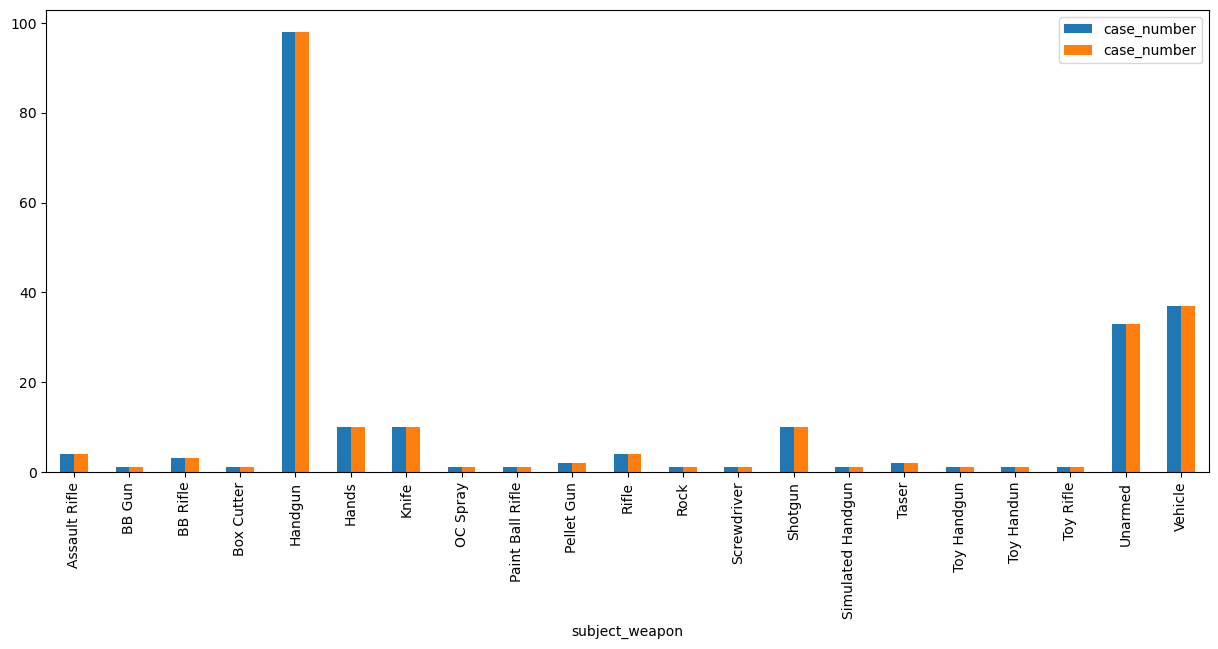

In [17]:
subject_incidents.groupby('subject_weapon').count().plot.bar(y=['case_number'],figsize=(15,6))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

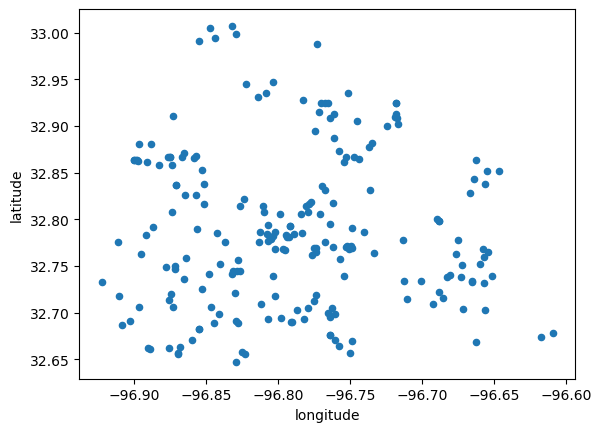

In [18]:
subject_incidents.plot.scatter(x='longitude',y='latitude')

## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Feature selection
- Here we will continue with the features selected feel free to explore other features.
- Create a `dataset` with the features: `race`, `subject_statuses`, `latitude`, `longitude`
    - HINT: Select the features of the DataFrame `subject_incidents` by filtering with a list of the columns.
- To make further processing easier apply `dropna()` to remove missing data.

In [19]:
data = subject_incidents[['race','subject_statuses','latitude','longitude']]

In [20]:
data

,race,subject_statuses,latitude,longitude
0,L,Injured,NaN,NaN
1,L,Injured,NaN,NaN
2,L,Other,NaN,NaN
3,B,Shoot and Miss,NaN,NaN
4,B,Shoot and Miss,NaN,NaN
...,...,...,...,...
218,B,Shoot and Miss,32.65628,-96.869793
219,B,Shoot and Miss,32.70483,-96.779494
220,L,Shoot and Miss,32.79473,-96.764017
221,B,Shoot and Miss,32.81664,-96.851409


In [21]:
data = data.dropna()

In [22]:
data.isna().sum()

race                0
subject_statuses    0
latitude            0
longitude           0
dtype: int64

In [23]:
data

,race,subject_statuses,latitude,longitude
9,L,Deceased,32.68642,-96.908674
10,B,Deceased,32.86400,-96.898998
11,W,Shoot and Miss,32.81482,-96.826787
12,B,Injured,32.77540,-96.767489
13,B,Shoot and Miss,32.74417,-96.828470
...,...,...,...,...
218,B,Shoot and Miss,32.65628,-96.869793
219,B,Shoot and Miss,32.70483,-96.779494
220,L,Shoot and Miss,32.79473,-96.764017
221,B,Shoot and Miss,32.81664,-96.851409


### Step 3.b: How to visualize features
- We want to visualize the two features: `race` and `subject_statuses`
- A way to visualize data is by color and size.
- Idea:
    - Map the race features to colors
    - Map the subject_statuses to a size

### Step 3.b.1: Convert column
- The `race` column has the following categories: B, W, A, L
- We can map that to color values ([docs](https://matplotlib.org/stable/gallery/color/named_colors.html))
- A simple way to map columns is by using `apply` on a lambda-function.
    - Create a dict with the mapping:
    ```Python
mapping = {'B': 'blue', 'W': 'yellow', 'A': 'red', 'L': 'cyan'}
```
    - Do the mapping with `apply`and `lambda` as follows
    ```Python
dataset['race'] = dataset['race'].apply(lambda x: mapping[x])
```

In [24]:
mapping ={'B':'green','W':'red','A':'orange','L':'blue'}
data['race'] = data['race'].apply(lambda x:mapping[x])

/var/folders/wp/x37vt6v52m7fgw1jdf8c_mj00000gn/T/ipykernel_20660/3909691864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['race'] = data['race'].apply(lambda x:mapping[x])


In [25]:
data

,race,subject_statuses,latitude,longitude
9,blue,Deceased,32.68642,-96.908674
10,green,Deceased,32.86400,-96.898998
11,red,Shoot and Miss,32.81482,-96.826787
12,green,Injured,32.77540,-96.767489
13,green,Shoot and Miss,32.74417,-96.828470
...,...,...,...,...
218,green,Shoot and Miss,32.65628,-96.869793
219,green,Shoot and Miss,32.70483,-96.779494
220,blue,Shoot and Miss,32.79473,-96.764017
221,green,Shoot and Miss,32.81664,-96.851409


### Step 3.b.2: Convert column
- The `subject_statuses` has the following categories: `'1 Deceased 1 Injured', '2 Injured', 'Deceased', 'Deceased Injured', 'Injured', 'Other', 'Shoot and Miss'`
- The main categories are: `'Deceased', 'Injured', 'Shoot and Miss'`
- A simple way is quite similar to last step.
    - Create a mapping of the main categories:
    ```Python
mapping = {'Deceased': 1000, 'Injured': 500, 'Shoot and Miss': 250}
```
    - Do the mapping with `apply`and `lambda` as follows
    ```Python
dataset['subject_statuses'] = dataset['subject_statuses'].apply(lambda x: mapping.get(x, 100))
```

In [26]:
mapping={'Deceased':1000,'Injured':500,'Shoot and Miss':250}

In [27]:
data['subject_statuses'] = data['subject_statuses'].apply(lambda x:mapping.get(x,100))

/var/folders/wp/x37vt6v52m7fgw1jdf8c_mj00000gn/T/ipykernel_20660/3574675870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['subject_statuses'] = data['subject_statuses'].apply(lambda x:mapping.get(x,100))


In [28]:
data

,race,subject_statuses,latitude,longitude
9,blue,1000,32.68642,-96.908674
10,green,1000,32.86400,-96.898998
11,red,250,32.81482,-96.826787
12,green,500,32.77540,-96.767489
13,green,250,32.74417,-96.828470
...,...,...,...,...
218,green,250,32.65628,-96.869793
219,green,250,32.70483,-96.779494
220,blue,250,32.79473,-96.764017
221,green,250,32.81664,-96.851409


### Step 3.c: Visualize the data
- Now we can visualize the data
- This can be done with a scatter plot
```Python
dataset.plot.scatter(x='longitude', y='latitude', s='subject_statuses', c='race', alpha=.5)
```
- Where `s=` is the size feature and `c=` is the color feature, `figsize=` sets the size of the figure, `alpha=` sets the transparency of the dots.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

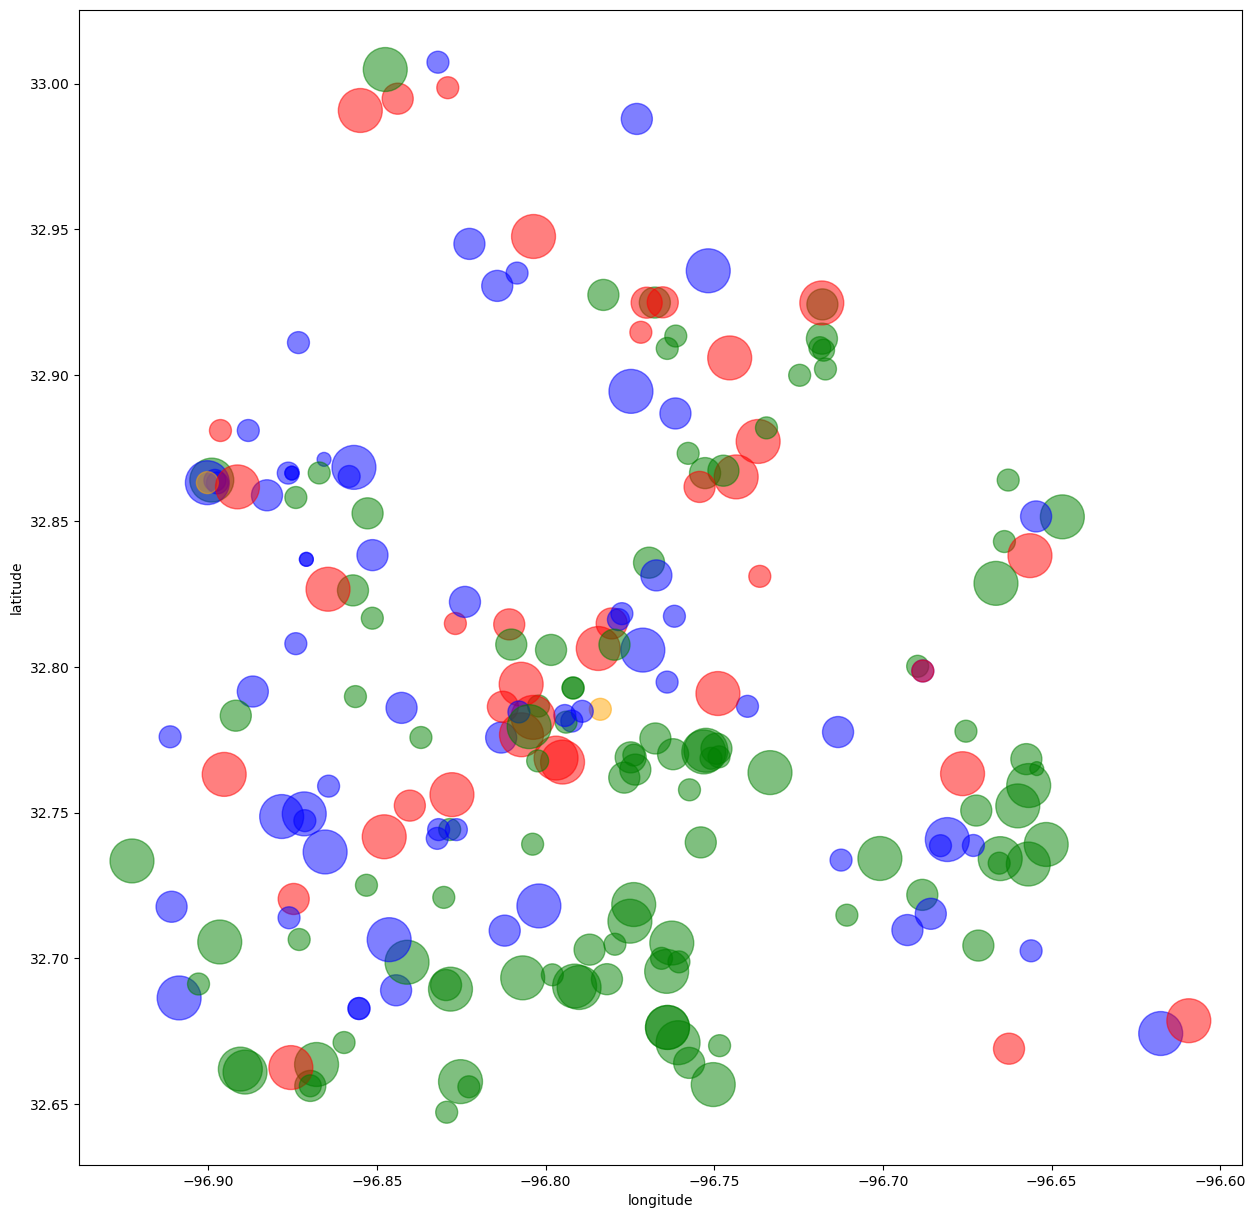

In [29]:
data.plot.scatter(x='longitude', y='latitude', s='subject_statuses', c='race', alpha=.5, figsize=(15,15))
# x : horizontal coordinates
# y : vertical coordinates
# s : size of each point
# c : color of each point

## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Present a chart
- The goal here is to present your message
- Visualize one chart
- Add a headline (title) to give the audience a message

### Step 4.b (Optional): Further improvements
- Ideas to improve the visualization
- Add description (legends) with color and size description.
- Visualize it on a map
    - You could use [folium](https://python-visualization.github.io/folium/)
    - Explore [quick guide](https://python-visualization.github.io/folium/quickstart.html)

In [30]:
import folium

In [31]:
m = folium.Map(location=[44.7174, -85.6340])
m

In [32]:
m.save("index.html")

In [33]:
folium.Map(location=[44.7174, -85.6340], zoom_start=15, titles="Traverse City")

In [34]:
m = folium.Map(location=[44.7174, -85.6340], zoom_start=14 )

folium.Marker([44.7180, -85.6330],icon=folium.Icon(color="red", icon="home"), popup="<i>Pravir's House</i>", tooltip="Click me!").add_to(m)
folium.Marker([44.7200, -85.6510],icon=folium.Icon(color="green",icon='shopping-cart'), popup="<b>Sams Club</b>", tooltip="Click me!").add_to(m)

m.add_child(folium.LatLngPopup())

m

In [35]:
m = folium.Map(location=[44.7174, -85.6340], zoom_start=14, tiles="Stamen Terrain")

folium.Marker([44.7180, -85.6330],icon=folium.Icon(color="red", icon="home"), popup="<i>Pravir's House</i>", tooltip="Click me!").add_to(m)
folium.Marker([44.7200, -85.6510],icon=folium.Icon(color="green",icon='shopping-cart'), popup="<b>Sams Club</b>", tooltip="Click me!").add_to(m)

m.add_child(folium.ClickForMarker(popup="waypoint"))
m

In [36]:
m = folium.Map(location=[44.7174, -85.6340], tiles="Stamen Toner", zoom_start=13)

folium.Circle(
    radius=30,
    location=[44.7180, -85.6330],
    popup="Pravir",
    color="crimson",
    fill=False,
).add_to(m)

folium.CircleMarker(
    location=[44.7200, -85.6510],
    radius=30,
    popup="Sams Club",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)


m

In [37]:
m = folium.Map(location=[32.8, -96.8], zoom_start=11)

for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['subject_statuses']//100,
        color=row['race'],
        fill=True,
        fill_color=row['race'],
    ).add_to(m)


m




In [ ]:
{'Black':'green',
 'White':'red',
 'Asian':'orange',
 'Latino':'blue'}

## Step 5: Actions
- Use insights
- Measure impact
- Main goal

### Step 5.a (Optional): Are there any insights?
- Any insights you want to highlight?
- Any future measurements?